Abstract :- This is the base code of Forecast the Deviation of Flight Time of Lithuanian Airports using Machine Learning Model. It contains 2 dataset which are Arrival Dataset and Departure Dataset. In this i have used three algorithm which are Decision Tree Classifier, Random Forest Classifier, Gradient Boosted algorithm, the highest accuracy is 92% by using GBC model in Departure dataset and the highest accuracy of arrival dataset is 83% by using the GBC model. 

# **IMPORTING CRUCIAL LIBRARIES**

In [1]:
# importing crucial libraries
import numpy as np 
# numpy for numerical data
import pandas as pd
# pandas for reading csv dataset
import matplotlib.pyplot as plt 
# To visualisr the database 
import seaborn as sns
# for heatmap

# **IMPORTING THE CSV DATA**

In [2]:
# import the arrival dataset
A_data = pd.read_csv("/content/dataset_arrival_unique_weather.csv", encoding = 'ISO-8859-1' , sep=';')


In [3]:
# import the departure dataset
D_data = pd.read_csv('/content/dataset_departure_unique_weather.csv', encoding = 'ISO-8859-1', sep=';')

In [4]:
pd.set_option('max_columns', None) # to print all the columns instead of ....

In [5]:
A_data.head() # to print starting 5 rows


,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,LANDED TIME,CLASS
0,2019-10-25,SAS,SAS,Kopenhaga,PalangaPLQ,13,Fog.,7 km/h,150,4 km,00:55:00,01:18:00,"Delay (15,30] min."
1,2019-10-25,AirBaltic,AirBaltic,TalinasTLL,VilniusVNO,11 °C,Sunny.,22 km/h,180,16 km,10:15:00,10:14:00,"On Time [-5, 5] min."
2,2019-10-25,WizzAir,WizzAir,Londonas/Lutonas,PalangaPLQ,13 °C,Drizzle. Dense fog.,6 km/h,200,1 km,10:20:00,10:07:00,"Early [-15,-5) min."
3,2019-10-25,CorendonEurope,CorendonEurope,HurgadaHRG,VilniusVNO,11 °C,Sunny.,22 km/h,180,16 km,10:30:00,10:28:00,"On Time [-5, 5] min."
4,2019-10-25,ScandinavianAirlines,ScandinavianAirlines,KopenhagaCPH,VilniusVNO,11 °C,Sunny.,22 km/h,180,16 km,10:35:00,10:43:00,"Delay (5, 15] min."


In [6]:
A_data = A_data.drop(['COMPANY'], axis=1) # to drop the columns

In [7]:
D_data.head() # to print the 2nd dataset 5 rows

,DATE,COMPANY,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,DEPARTURE TIME,CLASS
0,2019-10-25,AirBaltic,AirBaltic,PalangaPLQ,Ryga,12 °C,Fog.,4 km/h,170,2 km,05:40:00,05:34:00,"Early [-15,-5) min."
1,2019-10-25,SAS,SAS,PalangaPLQ,Kopenhaga,12 °C,Fog.,4 km/h,170,2 km,07:00:00,06:56:00,"On Time [-5, 5] min."
2,2019-10-25,AirBaltic,AirBaltic,VilniusVNO,RygaRIX,11 °C,Sunny.,26 km/h,180,16 km,10:45:00,10:45:00,"On Time [-5, 5] min."
3,2019-10-25,WizzAir,WizzAir,PalangaPLQ,Londonas/Lutonas,13 °C,Drizzle. Dense fog.,6 km/h,200,1 km,10:50:00,10:55:00,"On Time [-5, 5] min."
4,2019-10-25,Aeroflot,Aeroflot,VilniusVNO,MaskvaSVO,11 °C,Sunny.,22 km/h,190,16 km,11:05:00,11:05:00,"On Time [-5, 5] min."


In [8]:
D_data = D_data.drop(['COMPANY'], axis=1)

In [9]:
A_data.shape # to checking the shape of Arrival database

(7409, 12)

In [10]:
D_data.shape  # for checking the shape of departure database

(7057, 12)

In [11]:
A_data.tail()  # to print the last five rows of arrival database

,DATE,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,LANDED TIME,CLASS
7404,2020-03-14,WizzAir,LondonasLTN,VilniusVNO,1 °C,Snow showers. Passing clouds.,20 km/h,220,4 km,02:35:00,02:06:00,"Early (-inf, -15) min."
7405,2020-03-14,WizzAir,ReikjavikasKEF,VilniusVNO,1 °C,Snow flurries. Passing clouds.,19 km/h,210,NaN,03:15:00,02:54:00,"Early (-inf, -15) min."
7406,2020-03-14,NaN,MilanasMXP,VilniusVNO,2 °C,Passing clouds.,17 km/h,220,NaN,03:45:00,04:18:00,"Delay (30, inf) min."
7407,2020-03-14,AirBaltic,RygaRIX,VilniusVNO,-2 °C,Snow flurries. Partly sunny.,41 km/h,350,NaN,08:30:00,08:34:00,"On Time [-5, 5] min."
7408,2020-03-14,HOLIDAYEUROPE,HurgadaHRG,VilniusVNO,-2 °C,Snow flurries. Partly sunny.,41 km/h,350,NaN,08:40:00,08:16:00,"Early (-inf, -15) min."


In [12]:
D_data.tail()  # to print the last five rows of departure dataset

,DATE,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,DEPARTURE TIME,CLASS
7052,2020-03-16,UkraineInternationalAirlines,VilniusVNO,KijevasKBP,7 °C,Sunny.,24 km/h,210,16 km,17:05:00,22:53:00,"Delay (30, inf) min."
7053,2020-03-16,Belavia,VilniusVNO,MinskasMSQ,7 °C,Sunny.,20 km/h,210,16 km,17:40:00,17:40:00,"On Time [-5, 5] min."
7054,2020-03-16,Ryanair,KaunasKUN,BristolisBRS,4 °C,Drizzle. Mostly cloudy.,19 km/h,240,8 km,20:55:00,21:14:00,"Delay (15,30] min."
7055,2020-03-16,AirBaltic,PalangaPLQ,Ryga,4 °C,Clear.,11 km/h,200,20 km,05:50:00,05:47:00,"On Time [-5, 5] min."
7056,2020-03-16,AirBaltic,PalangaPLQ,Ryga,4 °C,Light rain. Overcast.,9 km/h,250,11 km,15:10:00,15:22:00,"Delay (5, 15] min."


In [13]:
len(A_data.columns) # for checking the length of the columns 

12

In [14]:
A_data.columns # to know the names of all the columns 

Index(['DATE', 'COMPANY.1', 'TO', 'FROM', 'TEMPERATURE', 'SKY INFORMATION',
       'WIND SPEED', 'WIND ANGLE', 'VISIBILITY', 'SCHEDULED TIME',
       'LANDED TIME', 'CLASS'],
      dtype='object')

In [15]:
D_data.columns # for checking the columns name of departure dataset

Index(['DATE', 'COMPANY.1', 'TO', 'FROM', 'TEMPERATURE', 'SKY INFORMATION',
       'WIND SPEED', 'WIND ANGLE', 'VISIBILITY', 'SCHEDULED TIME',
       'DEPARTURE TIME', 'CLASS'],
      dtype='object')

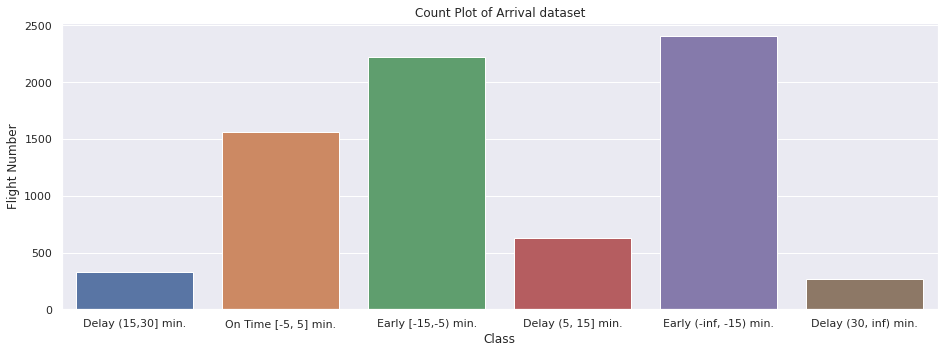

In [17]:
#count plot graph of target variable of arrival dataset
sns.countplot(x='CLASS',data=A_data ) 
sns.set(rc={'figure.figsize':(15.7,5.27)})
plt.xlabel ( 'Class')
plt.ylabel ( 'Flight Number')
plt.title ( 'Count Plot of Arrival dataset') 
plt.show()  

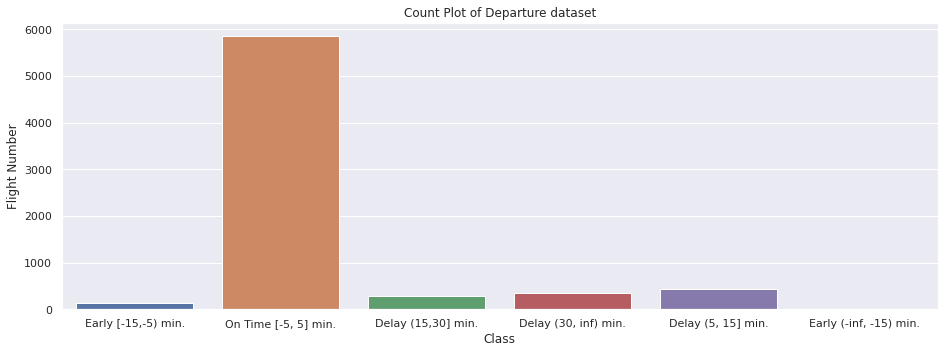

In [18]:
#count plot graph of target variable of departure dataset
sns.countplot(x='CLASS',data=D_data) 
plt.xlabel ( 'Class')
plt.ylabel ( 'Flight Number')
plt.title ( 'Count Plot of Departure dataset') 
plt.show()  

In [19]:
A_data.info() # to check the information about the arrival dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             7409 non-null   object
 1   COMPANY.1        7331 non-null   object
 2   TO               7409 non-null   object
 3   FROM             7409 non-null   object
 4   TEMPERATURE      7409 non-null   object
 5   SKY INFORMATION  7409 non-null   object
 6   WIND SPEED       7409 non-null   object
 7   WIND ANGLE       7409 non-null   int64 
 8   VISIBILITY       3780 non-null   object
 9   SCHEDULED TIME   7409 non-null   object
 10  LANDED TIME      7407 non-null   object
 11  CLASS            7409 non-null   object
dtypes: int64(1), object(11)
memory usage: 694.7+ KB


In [20]:
D_data.info()  # to check the information about the departure dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7057 entries, 0 to 7056
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DATE             7057 non-null   object
 1   COMPANY.1        6983 non-null   object
 2   TO               7057 non-null   object
 3   FROM             7057 non-null   object
 4   TEMPERATURE      7057 non-null   object
 5   SKY INFORMATION  7057 non-null   object
 6   WIND SPEED       7057 non-null   object
 7   WIND ANGLE       7057 non-null   int64 
 8   VISIBILITY       3762 non-null   object
 9   SCHEDULED TIME   7057 non-null   object
 10  DEPARTURE TIME   7057 non-null   object
 11  CLASS            7057 non-null   object
dtypes: int64(1), object(11)
memory usage: 661.7+ KB


In [21]:
A_data.nunique # to check the unique values of arrival dataset

<bound method DataFrame.nunique of             DATE             COMPANY.1                TO        FROM  \
0     2019-10-25                   SAS         Kopenhaga  PalangaPLQ   
1     2019-10-25             AirBaltic        TalinasTLL  VilniusVNO   
2     2019-10-25               WizzAir  Londonas/Lutonas  PalangaPLQ   
3     2019-10-25        CorendonEurope        HurgadaHRG  VilniusVNO   
4     2019-10-25  ScandinavianAirlines      KopenhagaCPH  VilniusVNO   
...          ...                   ...               ...         ...   
7404  2020-03-14               WizzAir       LondonasLTN  VilniusVNO   
7405  2020-03-14               WizzAir    ReikjavikasKEF  VilniusVNO   
7406  2020-03-14                   NaN        MilanasMXP  VilniusVNO   
7407  2020-03-14             AirBaltic           RygaRIX  VilniusVNO   
7408  2020-03-14         HOLIDAYEUROPE        HurgadaHRG  VilniusVNO   

     TEMPERATURE                 SKY INFORMATION WIND SPEED  WIND ANGLE  \
0             13         

In [22]:
D_data.nunique  # to check the unique values of departure dataset

<bound method DataFrame.nunique of             DATE                     COMPANY.1          TO              FROM  \
0     2019-10-25                     AirBaltic  PalangaPLQ              Ryga   
1     2019-10-25                           SAS  PalangaPLQ         Kopenhaga   
2     2019-10-25                     AirBaltic  VilniusVNO           RygaRIX   
3     2019-10-25                       WizzAir  PalangaPLQ  Londonas/Lutonas   
4     2019-10-25                      Aeroflot  VilniusVNO         MaskvaSVO   
...          ...                           ...         ...               ...   
7052  2020-03-16  UkraineInternationalAirlines  VilniusVNO        KijevasKBP   
7053  2020-03-16                       Belavia  VilniusVNO        MinskasMSQ   
7054  2020-03-16                       Ryanair   KaunasKUN      BristolisBRS   
7055  2020-03-16                     AirBaltic  PalangaPLQ              Ryga   
7056  2020-03-16                     AirBaltic  PalangaPLQ              Ryga   

    

# **PREPROCESSING**

In [23]:
A_data.isna().sum() # to check the null values

DATE                  0
COMPANY.1            78
TO                    0
FROM                  0
TEMPERATURE           0
SKY INFORMATION       0
WIND SPEED            0
WIND ANGLE            0
VISIBILITY         3629
SCHEDULED TIME        0
LANDED TIME           2
CLASS                 0
dtype: int64

In [24]:
#filling the null value
A_data['COMPANY.1'].fillna(A_data['COMPANY.1'].mode()[0], inplace=True)
A_data['VISIBILITY'].fillna(A_data['VISIBILITY'].mode()[0], inplace=True)
A_data['LANDED TIME'].fillna(A_data['LANDED TIME'].mode()[0], inplace=True)


In [25]:
A_data.isna().sum() # to detect the na value in arrival dataset

DATE               0
COMPANY.1          0
TO                 0
FROM               0
TEMPERATURE        0
SKY INFORMATION    0
WIND SPEED         0
WIND ANGLE         0
VISIBILITY         0
SCHEDULED TIME     0
LANDED TIME        0
CLASS              0
dtype: int64

In [26]:
D_data.isna().sum() # to find the missing values in departure dataset

DATE                  0
COMPANY.1            74
TO                    0
FROM                  0
TEMPERATURE           0
SKY INFORMATION       0
WIND SPEED            0
WIND ANGLE            0
VISIBILITY         3295
SCHEDULED TIME        0
DEPARTURE TIME        0
CLASS                 0
dtype: int64

In [27]:
# to fill the null values
#D_data['COMPANY'].fillna(D_data['COMPANY'].mode()[0], inplace=True)
D_data['COMPANY.1'].fillna(D_data['COMPANY.1'].mode()[0], inplace=True)
D_data['VISIBILITY'].fillna(D_data['VISIBILITY'].mode()[0], inplace=True)


In [28]:
# to label_encode the categorical data
from sklearn import preprocessing
# for converting the categorical data into numerical form
label_encoder = preprocessing.LabelEncoder()

In [29]:
# label_encoding
A_data['DATE']= label_encoder.fit_transform(A_data['DATE']) 
#  encoding of date attribute
A_data['COMPANY.1']= label_encoder.fit_transform(A_data['COMPANY.1']) 
# to encode the company.1 column
A_data['TO']= label_encoder.fit_transform(A_data['TO'])
#  encoding of To attribute
A_data['FROM']= label_encoder.fit_transform(A_data['FROM']) 
# to encode the from column
A_data['TEMPERATURE']= label_encoder.fit_transform(A_data['TEMPERATURE']) 
A_data['SKY INFORMATION']= label_encoder.fit_transform(A_data['SKY INFORMATION']) 
A_data['WIND SPEED']= label_encoder.fit_transform(A_data['WIND SPEED'])
#  encoding of Wind Speed attribute 
A_data['VISIBILITY']= label_encoder.fit_transform(A_data['VISIBILITY']) 
A_data['SCHEDULED TIME']= label_encoder.fit_transform(A_data['SCHEDULED TIME']) 
#  encoding of scheduled attribute
A_data['LANDED TIME']= label_encoder.fit_transform(A_data['LANDED TIME']) 
A_data['CLASS']= label_encoder.fit_transform(A_data['CLASS']) 

In [30]:
A_data.head() # for checking starting 50 rows data

,DATE,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,LANDED TIME,CLASS
0,0,24,41,1,13,12,26,150,33,7,77,0
1,0,2,93,2,11,83,8,180,18,59,316,5
2,0,30,52,1,14,6,25,200,5,60,309,4
3,0,9,34,2,11,83,8,180,18,62,330,5
4,0,25,42,2,11,83,8,180,18,63,345,2


In [31]:
# label encoding of departure dataset
D_data['DATE']= label_encoder.fit_transform(D_data['DATE']) 
D_data['COMPANY.1']= label_encoder.fit_transform(D_data['COMPANY.1']) 
# to encode the company.1 column
D_data['TO']= label_encoder.fit_transform(D_data['TO']) 
D_data['FROM']= label_encoder.fit_transform(D_data['FROM']) 
# to encode the from column
D_data['TEMPERATURE']= label_encoder.fit_transform(D_data['TEMPERATURE']) 
D_data['SKY INFORMATION']= label_encoder.fit_transform(D_data['SKY INFORMATION']) 
D_data['WIND SPEED']= label_encoder.fit_transform(D_data['WIND SPEED']) 
#  encoding of Wind Speed attribute 
D_data['VISIBILITY']= label_encoder.fit_transform(D_data['VISIBILITY']) 
D_data['SCHEDULED TIME']= label_encoder.fit_transform(D_data['SCHEDULED TIME']) 
#  encoding of scheduled attribute
D_data['DEPARTURE TIME']= label_encoder.fit_transform(D_data['DEPARTURE TIME']) 
D_data['CLASS']= label_encoder.fit_transform(D_data['CLASS']) 

In [32]:
D_data.head() # checking 50 rows of departure dataset

,DATE,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,DEPARTURE TIME,CLASS
0,0,2,1,93,9,13,17,170,14,15,18,4
1,0,28,1,48,9,13,17,170,14,31,86,5
2,0,2,2,94,8,88,9,180,9,70,217,5
3,0,34,1,60,10,7,19,200,2,71,227,5
4,0,1,2,73,8,88,7,190,9,74,237,5


# **SPLITTING THE ARRIVAL DATASET**

In [33]:
#Splitting the database into supporting or non supporting variable 
x=A_data.iloc[:,:-1]
y= A_data['CLASS']

In [34]:
x.shape  # for checking the shape for independent variable 

(7409, 11)

In [35]:
y.shape  # for checking the shape of dependent variable 

(7409,)

In [36]:
A_data["CLASS"].value_counts()   # to count the different classes of target variable 

3    2402
4    2221
5    1559
2     624
0     332
1     271
Name: CLASS, dtype: int64

In [37]:
A_data.groupby('CLASS').describe().T  # description of target variable

CLASS                        0            1            2            3  \
DATE        count   332.000000   271.000000   624.000000  2402.000000   
            mean     54.268072    59.298893    54.073718    65.206078   
            std      33.854101    36.522585    35.977312    38.419997   
            min       0.000000     0.000000     0.000000     0.000000   
            25%      26.750000    31.000000    22.000000    30.000000   
...                        ...          ...          ...          ...   
LANDED TIME min       0.000000     2.000000     2.000000     0.000000   
            25%     333.000000   380.500000   330.750000   378.250000   
            50%     589.000000   608.000000   577.000000   605.000000   
            75%     806.250000   838.500000   813.500000   843.000000   
            max    1135.000000  1133.000000  1135.000000  1135.000000   

CLASS                        4            5  
DATE        count  2221.000000  1559.000000  
            mean     62.969383    57.897370  
            std      37.115949    36.152806  
            min       0.000000     0.000000  
            25%      29.000000    27.000000  
...                        ...          ...  
LANDED TIME min       0.000000     0.000000  
            25%     387.000000   340.000000  
            50%     603.000000   583.000000  
            75%     837.000000   801.500000  
            max    1135.000000  1124.000000  

[88 rows x 6 columns]

In [38]:
x.head() # to check the rows data of indepndent variable 

,DATE,COMPANY.1,TO,FROM,TEMPERATURE,SKY INFORMATION,WIND SPEED,WIND ANGLE,VISIBILITY,SCHEDULED TIME,LANDED TIME
0,0,24,41,1,13,12,26,150,33,7,77
1,0,2,93,2,11,83,8,180,18,59,316
2,0,30,52,1,14,6,25,200,5,60,309
3,0,9,34,2,11,83,8,180,18,62,330
4,0,25,42,2,11,83,8,180,18,63,345


In [39]:
y.head()  # to check the data of dependent variable 

0    0
1    5
2    4
3    5
4    2
Name: CLASS, dtype: int64

In [40]:
# split the database into fitting and scoring 
from sklearn.model_selection import train_test_split 
# for train and test variable
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 0) 

In [41]:
x_train.shape # to check the shape 

(5927, 11)

In [42]:
# smote technique for over sampling
from imblearn.over_sampling import SMOTE
#importing the technique 
sm = SMOTE(random_state = 42)
#initializing the technique 
x_res, y_res = sm.fit_resample(x_train, y_train)
# fitting the technique 

In [43]:
x_res.shape # checking the shape after applying smote technique

(11502, 11)

In [44]:
y_res.shape  # checking the shape after applying smote technique

(11502,)

In [45]:
x_test.shape  # checking the shape of test variable

(1482, 11)

# **DecisionTreeClassifier**

In [47]:
# importing the classifier
from sklearn import tree
# initializing the classifier
model1 = tree.DecisionTreeClassifier(max_depth=14, splitter="best" ,max_features = 10  )
# fitting the classifier
model1.fit(x_res, y_res)
# checking the accuracy
model1.score(x_test,y_test)

0.611336032388664

In [48]:
# importing grid search
from sklearn.model_selection import GridSearchCV 
# importing decision tree classifier
# selecting the parameter
from sklearn.tree import DecisionTreeClassifier
# gardient parameters 
param_grid = {'max_features': [10],
              'max_depth' : [14],
              'criterion' :['gini']
             }
# initialising the model
tree_clas = DecisionTreeClassifier(random_state=1024)
# initializing the classifier
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
# fitting the model
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini'], 'max_depth': [14],
                         'max_features': [10]},
             verbose=True)

In [49]:
# checking the result 
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_search.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeClassifier(max_depth=14, max_features=10, random_state=1024)

 The best score across ALL searched params:
 0.6283086074526294

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 14, 'max_features': 10}


In [50]:
# importing cr , cm 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# initialising the predict variable
pred1 = model1.predict(x_test)

In [51]:
print(classification_report(y_test, pred1)) 
print()
# reprinting the performance 
print('Accuracy: ', accuracy_score(y_test, pred1))

              precision    recall  f1-score   support

           0       0.30      0.39      0.34        62
           1       0.31      0.36      0.33        56
           2       0.47      0.42      0.44       132
           3       0.68      0.70      0.69       485
           4       0.70      0.59      0.64       462
           5       0.59      0.68      0.63       285

    accuracy                           0.61      1482
   macro avg       0.51      0.52      0.51      1482
weighted avg       0.62      0.61      0.61      1482


Accuracy:  0.611336032388664


In [52]:
# various libraries for report
from sklearn.metrics import precision_score,recall_score,f1_score
# printing the performance 
print('Precision by DT of testing data is: %.3f' % precision_score(y_test, pred1,average='micro')) 
# checking the precision value
print('Recall by DT of testing data is: %.3f' % recall_score(y_test, pred1,average='micro')) 
# checking the recall value
print('F1 score by DT of testing data is: %.3f' % f1_score(y_test, pred1,average='micro')) 
# checking the f2 score

Precision by DT of testing data is: 0.611
Recall by DT of testing data is: 0.611
F1 score by DT of testing data is: 0.611


In [53]:
from sklearn.metrics import confusion_matrix
# for cm
cm = confusion_matrix(y_test,pred1)

Text(66.5, 0.5, 'Original Values')

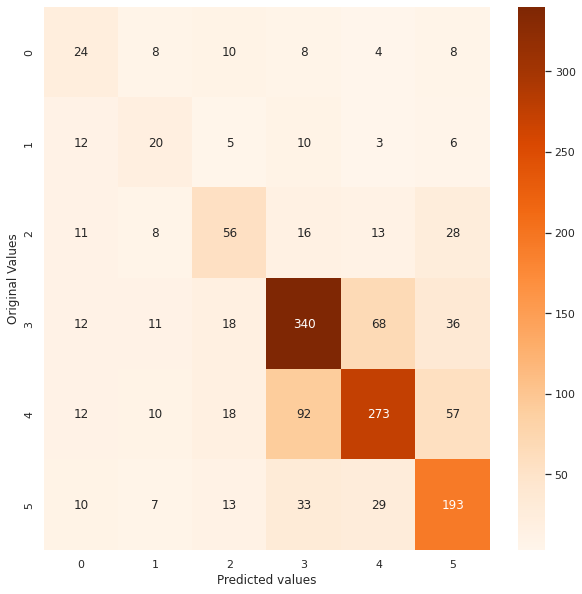

In [54]:
# making heat map 
import seaborn as sns
#assigning the size 
plt.figure(figsize=(10,10))
# assigning the color 
sns.heatmap(cm,annot=True, fmt='d' , cmap='Oranges')
# assigning the x-axis label
plt.xlabel('Predicted values')
# assigning the y-axis label
plt.ylabel('Original Values')

In [57]:
# importing RFC
from sklearn.ensemble import RandomForestClassifier
# initializing the classifier
model2 = RandomForestClassifier(n_estimators=1000,  max_depth=19 , max_features=11)
# fit the classifier
model2.fit(x_res,y_res)
# checking the performance of the classifier 
model2.score(x_test, y_test) 

0.7368421052631579

In [58]:
from sklearn.model_selection import GridSearchCV
# grid search taking       
from sklearn.ensemble import RandomForestClassifier
# importing the RFC     
rfc=RandomForestClassifier(random_state=42)
# initializing the model             
# selecting parameters
param_grid = { 
    'n_estimators': [1000],
    'max_features': [11],
    'max_depth' : [19],
    'criterion' :['gini', 'entropy']
}

In [59]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)   
# fit the grid search 
CV_rfc.fit(x_res, y_res)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [19],
                         'max_features': [11], 'n_estimators': [1000]})

In [60]:
# grid search resul on RFC
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",CV_rfc.best_estimator_)
print("\n The best score across ALL searched params:\n",CV_rfc.best_score_)
print("\n The best parameters across ALL searched params:\n",CV_rfc.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(criterion='entropy', max_depth=19, max_features=11,
                       n_estimators=1000, random_state=42)

 The best score across ALL searched params:
 0.8169908735332465

 The best parameters across ALL searched params:
 {'criterion': 'entropy', 'max_depth': 19, 'max_features': 11, 'n_estimators': 1000}


In [61]:
# importing cr , cm 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#initializing the predict variable
pred2 = model2.predict(x_test) 

In [62]:
print(classification_report(y_test, pred2)) 
print()
print('Accuracy: ', accuracy_score(y_test, pred2))

              precision    recall  f1-score   support

           0       0.43      0.47      0.45        62
           1       0.63      0.43      0.51        56
           2       0.64      0.58      0.61       132
           3       0.76      0.85      0.80       485
           4       0.77      0.75      0.76       462
           5       0.75      0.72      0.74       285

    accuracy                           0.74      1482
   macro avg       0.67      0.63      0.64      1482
weighted avg       0.74      0.74      0.73      1482


Accuracy:  0.7368421052631579


In [63]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by RF of testing data is: %.3f' % precision_score(y_test, pred2,average='micro')) 
# checking the precision value
print('Recall by RF of testing data is: %.3f' % recall_score(y_test, pred2,average='micro')) 
# checking the recall value
print('F1 score by RF of testing data is: %.3f' % f1_score(y_test, pred2,average='micro')) 
# checking the f2 score

Precision by RF of testing data is: 0.737
Recall by RF of testing data is: 0.737
F1 score by RF of testing data is: 0.737


In [64]:
# importing cm library
from sklearn.metrics import confusion_matrix
#initializing the cm
cm = confusion_matrix(y_test,pred2)

Text(66.5, 0.5, 'Original Values')

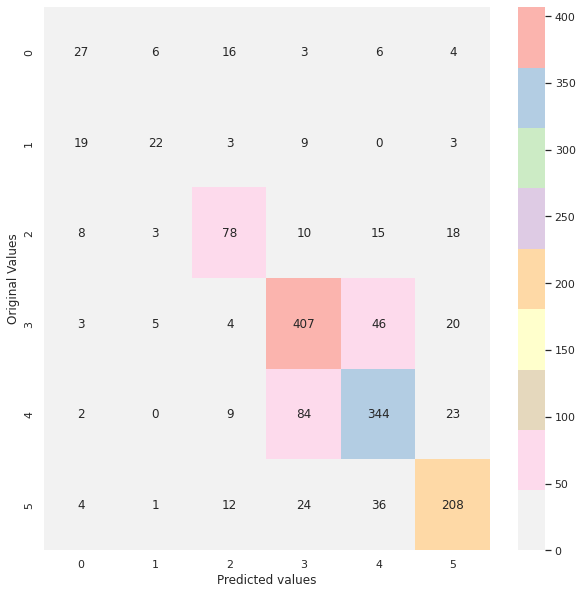

In [ ]:
# plotting confusion matrix
import seaborn as sns
#assigning the size 
plt.figure(figsize=(10,10))
# assigning the color
sns.heatmap(cm,annot=True, cmap='Pastel1_r',  fmt='d')
# assigning the x-axis label
plt.xlabel('Predicted values')
# assigning the y-axis label
plt.ylabel('Original Values')

In [65]:
# impoting GBC
from sklearn.ensemble import GradientBoostingClassifier
# initializing the model
model3 = GradientBoostingClassifier(max_depth = 7, n_estimators=189, learning_rate=0.4)
# fitting the model on training data
model3.fit(x_res,y_res) 
# checking the score
model3.score(x_test,y_test)


0.8333333333333334

In [66]:
from sklearn.model_selection import GridSearchCV
# taking grid search 
from sklearn.ensemble import GradientBoostingClassifier
# importing the GBC
GBC = GradientBoostingClassifier()  
# initializing
parameters = {'learning_rate': [0.4],
                  'n_estimators' : [189],
                  'max_depth'    : [7]
                 }

In [67]:
grid_GBC = GridSearchCV(estimator=GBC, param_grid = parameters, cv = 2, n_jobs=-1)
#fixing the classifier
grid_GBC.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.4], 'max_depth': [7],
                         'n_estimators': [189]})

In [68]:
# printing the result of grid search 
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBC.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBC.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.4, max_depth=7, n_estimators=189)

 The best score across ALL searched params:
 0.742702336919169

 The best parameters across ALL searched params:
 {'learning_rate': 0.4, 'max_depth': 7, 'n_estimators': 189}


In [69]:
# importing classsification report , confusion matrix 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred3 = model3.predict(x_test) 

In [70]:
print(classification_report(y_test, pred3)) 
print()
print('Accuracy: ', accuracy_score(y_test, pred3))

              precision    recall  f1-score   support

           0       0.53      0.50      0.52        62
           1       0.86      0.54      0.66        56
           2       0.72      0.59      0.65       132
           3       0.91      0.94      0.93       485
           4       0.84      0.88      0.86       462
           5       0.79      0.82      0.80       285

    accuracy                           0.83      1482
   macro avg       0.78      0.71      0.74      1482
weighted avg       0.83      0.83      0.83      1482


Accuracy:  0.8333333333333334


In [71]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by GBC of testing data is: %.3f' % precision_score(y_test, pred3,average='micro')) 
# checking the precision value
print('Recall by GBC of testing data is: %.3f' % recall_score(y_test, pred3,average='micro')) 
# checking the recall value
print('F1 score by GBC of testing data is: %.3f' % f1_score(y_test, pred3,average='micro')) 
# checking the f2 score

Precision by GBC of testing data is: 0.833
Recall by GBC of testing data is: 0.833
F1 score by GBC of testing data is: 0.833


In [72]:
# importing cm library
from sklearn.metrics import confusion_matrix
# initializing the cm
cm = confusion_matrix(y_test,pred3)

Text(66.5, 0.5, 'Original Values')

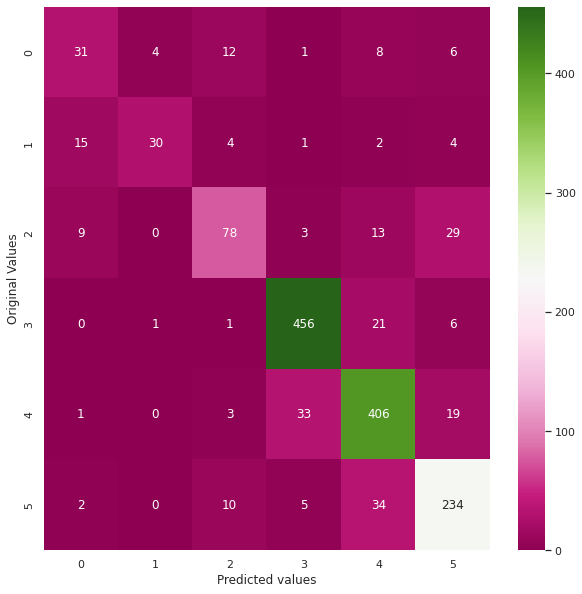

In [73]:
# plotting heat map
import seaborn as sns
# assigning the size 
plt.figure(figsize=(10,10))
# assigning the color
sns.heatmap(cm,annot=True,cmap='PiYG',  fmt='d')
# assigning the x-axis label
plt.xlabel('Predicted values')
# assigning the y-axis label
plt.ylabel('Original Values')

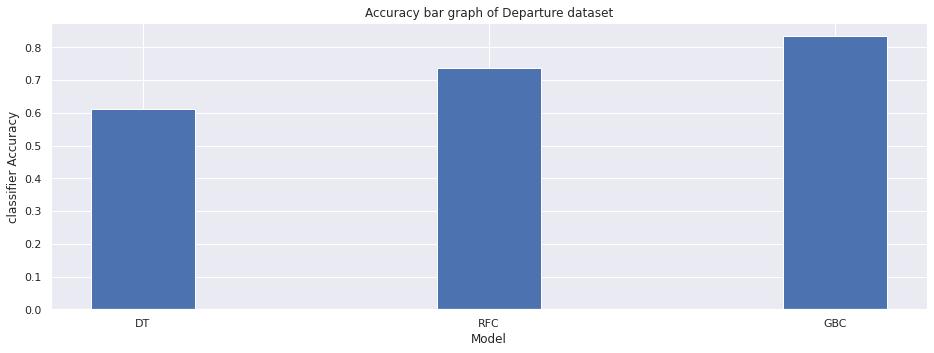

In [74]:
#Accuracy bar graph
x = [ 'DT' , 'RFC' , 'GBC']
y = [model1.score(x_test,y_test), model2.score(x_test,y_test) , model3.score(x_test,y_test)]
plt.bar ( x , y , width=0.3 )
plt.xlabel ( 'Model')
plt.ylabel ( 'classifier Accuracy')
plt.title ( 'Accuracy bar graph of Departure dataset')
plt.show()

# **SPLITTING THE DEPARTURE DATASET**

In [75]:
X=D_data.iloc[:,:-1] # SPLITTING THE DEPENDENT AND INDEPENDENT VARIABLE OF DEPARTURE DATASET
Y= D_data['CLASS']

In [76]:
X.shape  # CHECKING THE SHAPE OF X VARIABLE

(7057, 11)

In [77]:
Y.shape   # checking the shape of y variable 

(7057,)

In [78]:
# dividing the database into fitting and testing
from sklearn.model_selection import train_test_split 
# distribute the variable
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state = 0)

In [79]:
X_train.shape # checking the shape of x train variable 

(5645, 11)

In [80]:
# applying smote technique for oversampling
from imblearn.over_sampling import SMOTE 
# initializing the technique 
sm = SMOTE(random_state = 42)
# initializing its variable
X_res, Y_res = sm.fit_resample(X_train, Y_train)

In [81]:
# importing the DT Classifier
from sklearn import tree
# initializing the classifier
model1 = tree.DecisionTreeClassifier( max_depth= 199 , random_state=10, min_samples_split=2)
# fitting the classifier
model1.fit(X_res, Y_res)
# checking performance of the model
model1.score(X_test,Y_test)

0.8562322946175638

In [82]:
# importing distribution report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# initialising the predict attribute
pred1 = model1.predict(X_test) 

In [83]:
# printimg the result of classification report
print(classification_report(Y_test, pred1)) 
# addition of space
print()
# checking the performance
print('Accuracy: ', accuracy_score(Y_test, pred1))

              precision    recall  f1-score   support

           0       0.31      0.50      0.38        44
           1       0.54      0.56      0.55        77
           2       0.53      0.60      0.56        92
           3       0.50      0.50      0.50         2
           4       0.48      0.64      0.55        25
           5       0.96      0.91      0.93      1172

    accuracy                           0.86      1412
   macro avg       0.55      0.62      0.58      1412
weighted avg       0.88      0.86      0.86      1412


Accuracy:  0.8562322946175638


In [84]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by DT of testing data is: %.3f' % precision_score(Y_test, pred1,average='micro')) 
# checking the precision value
print('Recall by DT of testing data is: %.3f' % recall_score(Y_test, pred1,average='micro')) 
# checking the recall value
print('F1 score by DT of testing data is: %.3f' % f1_score(Y_test, pred1,average='micro')) 
# checking the f2 score

Precision by DT of testing data is: 0.856
Recall by DT of testing data is: 0.856
F1 score by DT of testing data is: 0.856


In [85]:
# define color containing variable
cmap = ['vlag', 'gnuplot_r', 'Purples_r', 'Oranges', 'Greys', 'Spectral_r', 'tab20_r', 'RdYlBu', 'Reds_r', 'viridis', 'PuBu', 'RdPu_r', 'Wistia', 'Wistia_r', 'flag', 'PuOr', 'Set1_r', 'YlGnBu_r', 'autumn_r', 'bwr_r', 'Paired', 'RdYlGn', 'hot_r', 'PiYG_r', 'icefire_r', 'Set2_r', 'PuRd', 'Blues_r', 'OrRd', 'pink_r', 'gray_r', 'gist_yarg_r', 'gnuplot2_r', 'Dark2_r', 'rocket', 'gist_rainbow', 'BuPu_r', 'bwr', 'BuGn', 'PRGn_r', 'prism', 'gnuplot', 'YlGn', 'plasma', 'Pastel1_r', 'tab20c_r', 'PiYG', 'terrain_r', 'ocean', 'GnBu_r', 'Blues', 'brg_r', 'binary_r', 'gist_gray', 'rocket_r', 'gist_earth', 'cubehelix_r', 'Pastel2_r', 'Set3', 'Purples', 'afmhot_r', 'icefire', 'cool_r', 'seismic', 'gist_gray_r', 'flag_r', 'RdYlGn_r', 'Set2', 'Set3_r', 'jet', 'gray', 'rainbow_r', 'nipy_spectral', 'Reds', 'gist_heat_r', 'Dark2', 'inferno_r', 'viridis_r', 'spring', 'Accent', 'cividis_r', 'tab20b_r', 'terrain', 'YlOrBr', 'rainbow', 'magma', 'gist_ncar_r', 'gist_stern', 'Oranges_r', 'winter', 'bone_r', 'BuPu', 'magma_r', 'RdBu', 'binary', 'ocean_r', 'RdGy_r', 'gist_rainbow_r', 'BrBG_r', 'inferno', 'Accent_r', 'PuOr_r', 'YlOrBr_r', 'Paired_r', 'pink', 'Greens', 'plasma_r', 'tab20c', 'tab10_r', 'GnBu', 'hsv', 'YlOrRd', 'winter_r', 'Set1', 'YlOrRd_r', 'PuRd_r', 'prism_r', 'mako', 'cividis', 'CMRmap', 'RdGy', 'summer_r', 'coolwarm_r', 'YlGn_r', 'bone', 'gnuplot2', 'BuGn_r', 'PuBuGn', 'copper_r', 'tab20b', 'RdBu_r', 'PRGn', 'jet_r', 'gist_ncar', 'PuBu_r', 'Pastel1', 'hot', 'copper', 'YlGnBu', 'brg', 'Pastel2', 'tab10', 'Greens_r', 'cubehelix', 'Greys_r', 'spring_r', 'tab20', 'gist_stern_r', 'vlag_r', 'PuBuGn_r', 'gist_earth_r', 'mako_r', 'cool', 'hsv_r', 'nipy_spectral_r', 'gist_yarg', 'OrRd_r', 'seismic_r', 'afmhot', 'summer', 'coolwarm', 'CMRmap_r', 'Spectral', 'BrBG', 'gist_heat', 'RdPu', 'RdYlBu_r', 'autumn']

In [86]:
# importing cm library
from sklearn.metrics import confusion_matrix
# initializing the cm
cm = confusion_matrix(Y_test,pred1)

Text(66.5, 0.5, 'Original Values')

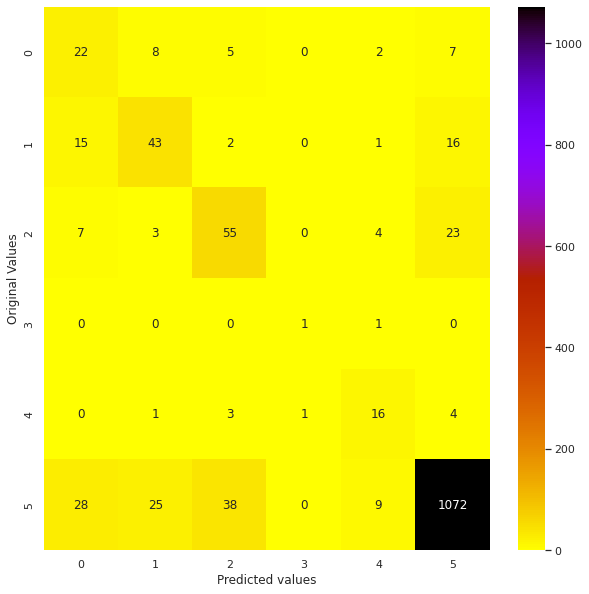

In [87]:
# plotting heat map
import seaborn as sns
# defining the shape 
plt.figure(figsize=(10,10))
# defining the color
sns.heatmap(cm,annot=True,cmap='gnuplot_r',  fmt='d')
# assigning the x-axis name 
plt.xlabel('Predicted values')
# assigning the y-axis name 
plt.ylabel('Original Values')

In [88]:
# importing RFC 
from sklearn.ensemble import RandomForestClassifier
# initializing the classifier
model2 = RandomForestClassifier(n_estimators=500, random_state=50,max_depth=22)
# fixing the classifier
model2.fit(X_res, Y_res) 
# checking score
model2.score(X_test, Y_test)

0.8725212464589235

In [89]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#initializing the information
pred2 = model2.predict(X_test) 

In [90]:
# printing the result of classification report 
print(classification_report(Y_test, pred2)) 
print()
print('Accuracy: ', accuracy_score(Y_test, pred2))

              precision    recall  f1-score   support

           0       0.42      0.45      0.43        44
           1       0.75      0.39      0.51        77
           2       0.55      0.62      0.58        92
           3       0.50      0.50      0.50         2
           4       0.49      0.76      0.59        25
           5       0.94      0.94      0.94      1172

    accuracy                           0.87      1412
   macro avg       0.61      0.61      0.59      1412
weighted avg       0.88      0.87      0.87      1412


Accuracy:  0.8725212464589235


In [92]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by RF of testing data is: %.3f' % precision_score(Y_test, pred2,average='micro')) 
# checking the precision value
print('Recall by RF of testing data is: %.3f' % recall_score(Y_test, pred2,average='micro')) 
# checking the recall value
print('F1 score by RF of testing data is: %.3f' % f1_score(Y_test, pred2,average='micro')) 
# checking the f2 score

Precision by RF of testing data is: 0.873
Recall by RF of testing data is: 0.873
F1 score by RF of testing data is: 0.873


In [93]:
# importing cm library
from sklearn.metrics import confusion_matrix
# initializing the cm
cm = confusion_matrix(Y_test,pred2)

Text(66.5, 0.5, 'Original Values')

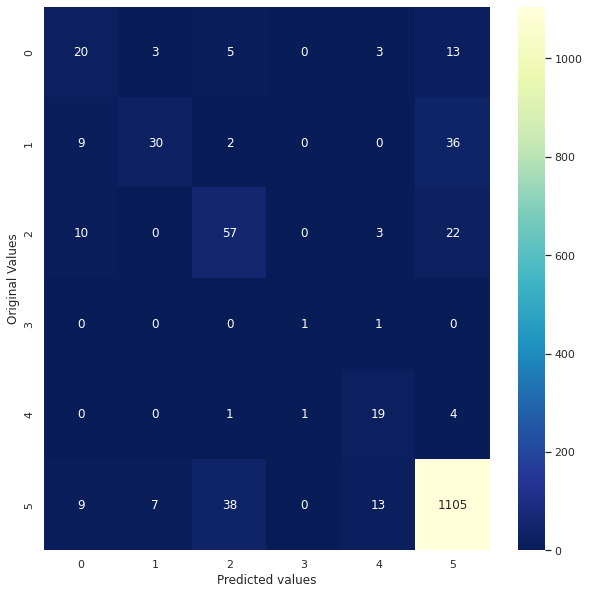

In [94]:
# plotting heat map
import seaborn as sns
# define the shape 
plt.figure(figsize=(10,10))
# define the color
sns.heatmap(cm,annot=True,cmap='YlGnBu_r',  fmt='d')
# defining the x-axis name 
plt.xlabel('Predicted values')
# defining the y-axis name 
plt.ylabel('Original Values')

In [95]:
# importing GBC
from sklearn.ensemble import GradientBoostingClassifier
# Initializing GBC
model3 = GradientBoostingClassifier(max_depth = 6, n_estimators=150, learning_rate=0.3)
# fitting the classifier
model3.fit(X_res,Y_res) 
# checking the performance
model3.score(X_test,Y_test)


0.9213881019830028

In [96]:
# importing cr
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred3 = model3.predict(X_test) 

In [97]:
# printing the result 
print(classification_report(Y_test, pred3)) 
print()
print('Accuracy: ', accuracy_score(Y_test, pred3))

              precision    recall  f1-score   support

           0       0.62      0.57      0.60        44
           1       0.90      0.79      0.84        77
           2       0.68      0.64      0.66        92
           3       0.33      0.50      0.40         2
           4       0.57      0.68      0.62        25
           5       0.96      0.97      0.97      1172

    accuracy                           0.92      1412
   macro avg       0.68      0.69      0.68      1412
weighted avg       0.92      0.92      0.92      1412


Accuracy:  0.9213881019830028


In [98]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('Precision by GBC of testing data is: %.3f' % precision_score(Y_test, pred3,average='micro')) 
# checking the precision value
print('Recall by GBC of testing data is: %.3f' % recall_score(Y_test, pred3,average='micro')) 
# checking the recall value
print('F1 score by GBC of testing data is: %.3f' % f1_score(Y_test, pred3,average='micro')) 
# checking the f2 score

Precision by GBC of testing data is: 0.921
Recall by GBC of testing data is: 0.921
F1 score by GBC of testing data is: 0.921


In [99]:
# importing cm library
from sklearn.metrics import confusion_matrix
# initializing the cm
cm = confusion_matrix(Y_test,pred3)

Text(66.5, 0.5, 'Original Values')

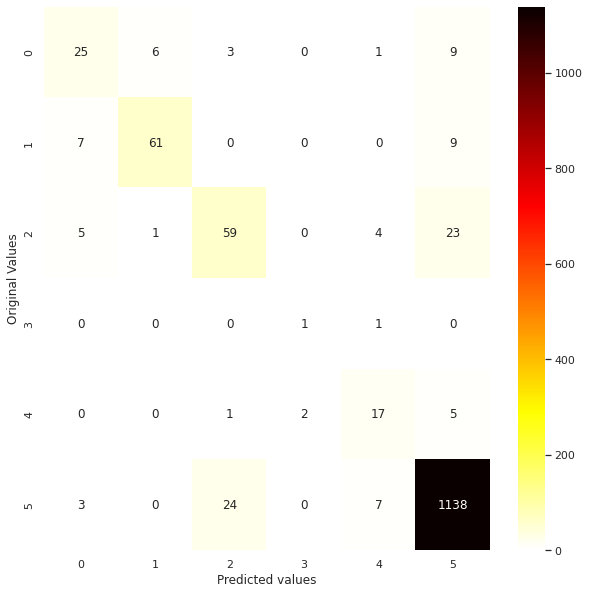

In [100]:
# plotting heat map
import seaborn as sns
# defining the shape 
plt.figure(figsize=(10,10))
# defining the color
sns.heatmap(cm,annot=True,cmap= 'hot_r',  fmt='d')
# defining the x-axis name 
plt.xlabel('Predicted values')
# defining the y-axis name 
plt.ylabel('Original Values')

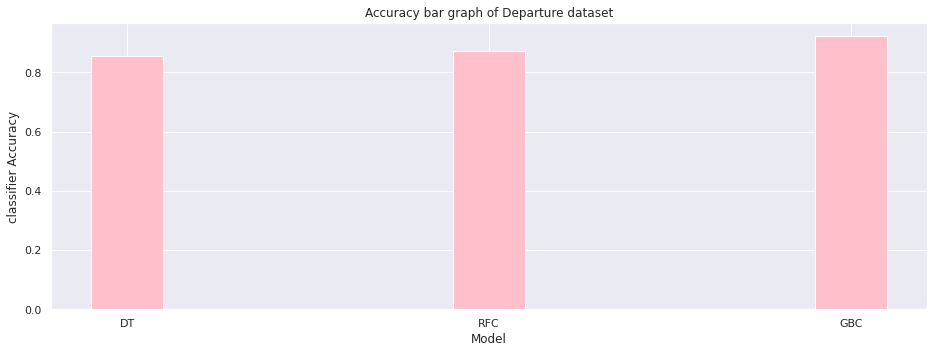

In [101]:
#Accuracy bar graph
x = [ 'DT' , 'RFC' , 'GBC']
y = [model1.score(X_test,Y_test), model2.score(X_test,Y_test) , model3.score(X_test,Y_test)]
plt.bar ( x , y , width=0.2, color='PINK' )
plt.xlabel ( 'Model')
plt.ylabel ( 'classifier Accuracy')
plt.title ( 'Accuracy bar graph of Departure dataset')
plt.show()